### DLIME


### Import data

In [1]:
from sklearn.utils import Bunch
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = Bunch()
data.train = np.load("../data/breast/X_train.npy")
data.test = np.load("../data/breast/X_test.npy")
data.labels_train = np.load("../data/breast/y_train.npy")
data.labels_test = np.load("../data/breast/y_test.npy")

data.feature_names = ['mean radius',
                 'mean texture',
                 'mean perimeter',
                 'mean area',
                 'mean smoothness',
                 'mean compactness',
                 'mean concavity',
                 'mean concave points',
                 'mean symmetry',
                 'mean fractal dimension',
                 'radius error',
                 'texture error',
                 'perimeter error',
                 'area error',
                 'smoothness error',
                 'compactness error',
                 'concavity error',
                 'concave points error',
                 'symmetry error',
                 'fractal dimension error',
                 'worst radius',
                 'worst texture',
                 'worst perimeter',
                 'worst area',
                 'worst smoothness',
                 'worst compactness',
                 'worst concavity',
                 'worst concave points',
                 'worst symmetry',
                 'worst fractal dimension']
data.target_names = ['malignant', 'benign']
data.categorical_features = None

### Build classifier

In [2]:
rf = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=5, max_features=5)
rf.fit(data.train, data.labels_train)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=10,
                       random_state=0)

### Build explainer


In [3]:
from xaibenchmark.explainers.dlime import DLimeExplainer

exp = DLimeExplainer(data, rf, discretize_continuous=False)

### Explain instance and Plot

In [4]:
exp.explain_instance(1)

(<Figure size 288x144 with 1 Axes>,
 ['25.59 < worst texture <= 29.88',
  'worst compactness > 0.33',
  'mean radius > 15.75',
  'mean concavity > 0.13',
  'worst perimeter > 125.25',
  'mean perimeter > 103.75',
  'mean concave points > 0.07',
  'worst concave points > 0.16',
  'worst area > 1047.00',
  'worst radius > 18.55'])

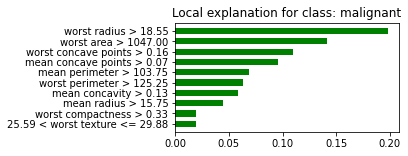

In [7]:
exp.explanation.as_pyplot_to_figure(type='h', name =.3, label='0')

### Using DLIME

In [5]:
from xaibenchmark.dlime.explainer_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(data.train,
                                 mode="classification",
                                 feature_names=data.feature_names,
                                 class_names=data.target_names,
                                 discretize_continuous=True,
                                 verbose=False)

### Clustering

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering

data = load_breast_cancer()
X = data.data

clustering = AgglomerativeClustering().fit(X)
names = list(data.feature_names)+["membership"]
clustered_data = np.column_stack([X, clustering.labels_])

nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(data.train)
distances, indices = nbrs.kneighbors(data.test)
clabel = clustering.labels_

### Explain instance

In [5]:
from sklearn.linear_model import LinearRegression

p_label = clabel[indices[0]]
N = clustered_data[clustered_data[:, 30] == p_label]
subset = np.delete(N, 30, axis=1)

exp_dlime = explainer.explain_instance_hclust(data.test[0],
                                     rf.predict_proba,
                                     num_features=10,
                                     model_regressor=LinearRegression(),
                                     clustered_data = subset,
                                     regressor = 'linear', labels=(0,1))

In [6]:
exp_dlime.score


{0: 0.4664340395863895, 1: 0.4664340395863895}

### Show graph

(<Figure size 288x144 with 1 Axes>,
 ['mean texture > 21.88',
  'mean radius > 15.75',
  'mean concavity > 0.13',
  'worst texture > 29.88',
  'worst perimeter > 125.25',
  'mean perimeter > 103.75',
  'mean concave points > 0.07',
  'worst concave points > 0.16',
  'worst area > 1047.00',
  'worst radius > 18.55'])

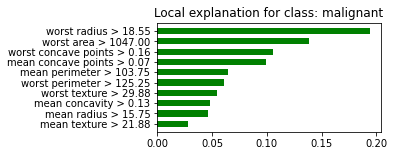

In [7]:
exp_dlime.as_pyplot_to_figure(type='h', name =.3, label='0')
